In [1]:
from keras.layers import Input, Dense
import matplotlib.image as img
from scipy.cluster.vq import kmeans, vq, whiten
import seaborn as sns, pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from keras.models import Sequential
import tensorflow as tf
from keras.models import Model
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
import numpy as np

from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.layers import Flatten

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report,confusion_matrix
from keras.optimizers import Adam
from keras.models import Model
from scipy.special import expit as sigmoid

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


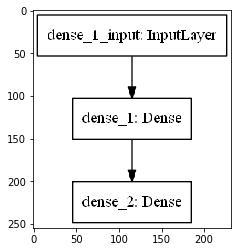

In [2]:
model= Sequential()

model.add(Dense(4, input_shape=(4,),
activation='tanh'
))

#model.add(Dense(50, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=Adam(0.01),loss='mae')

model.summary()

plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()

In [3]:
banknotes=pd.read_csv('banknote.csv')
print(banknotes.head())

#sns.pairplot(banknotes, hue='class') 
#plt.show()

   variance  skewness  kurtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [4]:
# Describe the data
print('Dataset stats: \n', banknotes.describe)

# Count the number of observations of each class
print('Observations per class: \n', banknotes['class'].value_counts)

Dataset stats: 
 <bound method NDFrame.describe of       variance  skewness  kurtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>
Observations per class: 
 <bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64>


In [5]:
X=banknotes[['variance','skewness','kurtosis','entropy']]
y=banknotes['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
#print(X_train)
#print(y_train)

model.fit(X_train,y_train, epochs=20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

Epoch 1/20
960/960 [==============================] - 0s 213us/step - loss: 0.7427 - accuracy: 0.5708
Epoch 2/20
960/960 [==============================] - 0s 34us/step - loss: 0.6771 - accuracy: 0.6552
Epoch 3/20
960/960 [==============================] - 0s 44us/step - loss: 0.6326 - accuracy: 0.6740
Epoch 4/20
960/960 [==============================] - 0s 45us/step - loss: 0.5987 - accuracy: 0.6979
Epoch 5/20
960/960 [==============================] - 0s 34us/step - loss: 0.5681 - accuracy: 0.7208
Epoch 6/20
960/960 [==============================] - 0s 49us/step - loss: 0.5369 - accuracy: 0.7469
Epoch 7/20
960/960 [==============================] - 0s 35us/step - loss: 0.5042 - accuracy: 0.7740
Epoch 8/20
960/960 [==============================] - 0s 47us/step - loss: 0.4717 - accuracy: 0.7979
Epoch 9/20
960/960 [==============================] - 0s 36us/step - loss: 0.4422 - accuracy: 0.8219
Epoch 10/20
960/960 [==============================] - 0s 33us/step - loss: 0.4159 - accur